In [1]:
import plotly.express as px
import plotly.graph_objects as go
import json 
import numpy as np

In [2]:
data_sync_bs1 = json.load(open('sync_endpoint_20_trials_bs_1.json', 'r'))
data_sync_bs5 = json.load(open('sync_endpoint_20_trials_bs_5.json', 'r'))
data_async_bs1 = json.load(open('async_endpoint_20_trials_bs_1.json', 'r'))
data_async_bs5 = json.load(open('async_endpoint_20_trials_bs_5.json', 'r'))

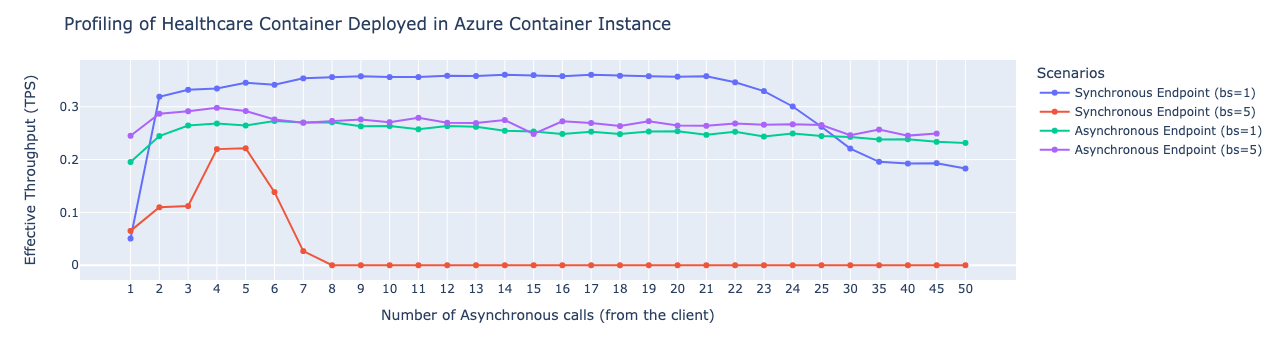

In [5]:
x = []
y1, y2, y3, y4 = [], [], [], []

for ncc in data_sync_bs1: 
    x.append(ncc)
    try: 
        y1.append(np.mean([trial['throughput'] for trial in data_sync_bs1[ncc]]))
    except: 
        y1.append(0)
    try: 
        y2.append(np.mean([trial['throughput'] for trial in data_sync_bs5[ncc]]))
    except: 
        y2.append(0)
    try:
        y3.append(np.mean([trial['throughput'] for trial in data_async_bs1[ncc]]))
    except: 
        y3.append(0)
    try: 
        y4.append(np.mean([trial['throughput'] for trial in data_async_bs5[ncc]]))
    except: 
        y4.append(0)

        
data = {"ncc": x, "Synchronous Endpoint (bs=1)": y1, "Synchronous Endpoint (bs=5)": y2, "Asynchronous Endpoint (bs=1)": y3, "Asynchronous Endpoint (bs=5)": y4}
fig = px.line(
    data, 
    x="ncc", 
    y=["Synchronous Endpoint (bs=1)", "Synchronous Endpoint (bs=5)", "Asynchronous Endpoint (bs=1)", "Asynchronous Endpoint (bs=5)"], 
    markers=True
)
fig.update_layout(
    title="Profiling of Healthcare Container Deployed in Azure Container Instance",
    xaxis_title="Number of Asynchronous calls (from the client)",
    yaxis_title="Effective Throughput (TPS)",
    legend_title="Scenarios",
)
fig.show()